In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array

In [2]:
# Read Data

In [3]:
dff = pd.read_csv("/home/pratik/Desktop/2ndSem/Smai-2/Datasets/Question-4/weather.csv")

In [4]:
dff.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [5]:
dff.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992650,-0.631860,0.006087,0.028669,0.393023,-0.008325
Apparent Temperature (C),0.992650,1.000000,-0.602287,-0.059701,0.027553,0.381814,-0.002696
Humidity,-0.631860,-0.602287,1.000000,-0.222247,0.001742,-0.370555,0.007628
Wind Speed (km/h),0.006087,-0.059701,-0.222247,1.000000,0.104298,0.100110,-0.048356
Wind Bearing (degrees),0.028669,0.027553,0.001742,0.104298,1.000000,0.048980,-0.010738
Visibility (km),0.393023,0.381814,-0.370555,0.100110,0.048980,1.000000,0.058638
Pressure (millibars),-0.008325,-0.002696,0.007628,-0.048356,-0.010738,0.058638,1.000000


In [6]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77285 entries, 0 to 77284
Data columns (total 11 columns):
Formatted Date              77285 non-null object
Summary                     77285 non-null object
Precip Type                 76881 non-null object
Temperature (C)             77285 non-null float64
Apparent Temperature (C)    77285 non-null float64
Humidity                    77285 non-null float64
Wind Speed (km/h)           77285 non-null float64
Wind Bearing (degrees)      77285 non-null int64
Visibility (km)             77285 non-null float64
Pressure (millibars)        77285 non-null float64
Daily Summary               77285 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 6.5+ MB


In [7]:
#Coorelation Matrix

In [8]:
# Normalize Data 

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_d = dff.select_dtypes(exclude=['object'])
dff[num_d.columns] = sc.fit_transform(num_d)

In [10]:
uniform_data = np.array(dff)
data = dff
data = data.drop(columns = ['Formatted Date','Summary','Precip Type','Daily Summary'])

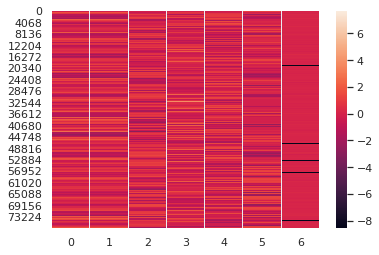

In [11]:
sns.set()
uniform_data = np.array(data)
ax = sns.heatmap(uniform_data)

In [12]:
msk = np.random.rand(len(dff)) < 0.2
temp_df = dff[msk].copy()
training_df = dff[~msk].copy()

msk = np.random.rand(len(temp_df)) < 0.2
test_df = temp_df[msk].copy()
validation_df = temp_df[~msk].copy()

In [13]:
print(training_df.shape)
print(validation_df.shape)
print(test_df.shape)

(61699, 11)
(12516, 11)
(3070, 11)


In [18]:
validation_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
22,2006-04-10 03:00:00.000 +0200,Partly Cloudy,rain,-0.499219,-0.541651,0.284381,0.039803,-0.072106,1.307063,0.096098,Mostly cloudy throughout the day.
24,2006-04-10 05:00:00.000 +0200,Partly Cloudy,rain,-0.537541,-0.613682,0.489054,0.319936,-0.491346,1.099533,0.096268,Mostly cloudy throughout the day.
25,2006-04-10 06:00:00.000 +0200,Mostly Cloudy,rain,-0.488187,-0.531286,0.591390,0.053810,-0.435447,-0.991142,0.096525,Mostly cloudy throughout the day.
29,2006-04-10 10:00:00.000 +0200,Mostly Cloudy,rain,0.330516,0.395793,-0.636645,0.978250,-0.342283,-0.088001,0.091742,Mostly cloudy throughout the day.
42,2006-04-11 00:00:00.000 +0200,Overcast,rain,0.192324,0.272459,-0.687813,0.912885,-0.258435,1.307063,0.035370,Foggy in the evening.
...,...,...,...,...,...,...,...,...,...,...,...
77241,2016-09-07 20:00:00.000 +0200,Partly Cloudy,rain,0.948317,0.947170,-0.022628,-1.519605,-1.655900,1.241729,0.138462,Partly cloudy throughout the day.
77243,2016-09-07 22:00:00.000 +0200,Partly Cloudy,rain,0.710255,0.734703,0.540222,-1.566294,-1.749064,1.372397,0.140255,Partly cloudy throughout the day.
77250,2016-09-08 05:00:00.000 +0200,Mostly Cloudy,rain,0.502385,0.549184,0.847230,-0.025561,-1.730431,0.911218,0.124027,Partly cloudy starting overnight.
77255,2016-09-08 12:00:00.000 +0200,Partly Cloudy,rain,1.759472,1.614107,-1.864680,0.403976,-0.556561,1.372397,0.114547,Partly cloudy starting overnight.


# Training Data Cost Function = MSE

In [47]:
mse = []
mae = []
mape = []
rscore = []

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def cost(X,Y,W):
    result = np.matmul(X,W)
    result = np.subtract(result,Y)
    result = np.square(result)
    result = np.sum(result)
    return result/2

def calculate(X,Y,W,iteration,learningrate):
#     global iteration,learningrate
    for i in range(0,iteration):
        temp = X.dot(W)
        temp = np.subtract(temp,Y)
        temp = X.T.dot(temp)
        temp = learningrate * temp
        W = np.subtract(W,temp)
        print(i,cost(X,Y,W))
    return W

def train(df,learning,iteration):
#     global FinalW
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = calculate(X,Y,W,iteration,learning)
    
    X_val = validation_df.iloc[:,3:10]
    X_val = X_val.drop(columns = ['Apparent Temperature (C)'])
    X_val = np.array(X_val)
    A=np.ones(len(validation_df))
    X_val = np.c_[A,X_val]
    y_pred = np.matmul(X_val,W)
    y_true = validation_df.iloc[:,4]
    y_true = np.array(y_true)
    
    rscore.append(r2_score(y_true,y_pred))
    mse.append(mean_squared_error(y_true, y_pred))
    mae.append(mean_absolute_error(y_true,y_pred))

In [49]:
learning = [0.00001,0.000001,0.0000001,0.0000001]
iterations = [1000,3000,5000,7000,10000]

for i in learning:
    for j in iterations:
        train(training_df,i,j)


Text(0, 0.5, 'MSE')

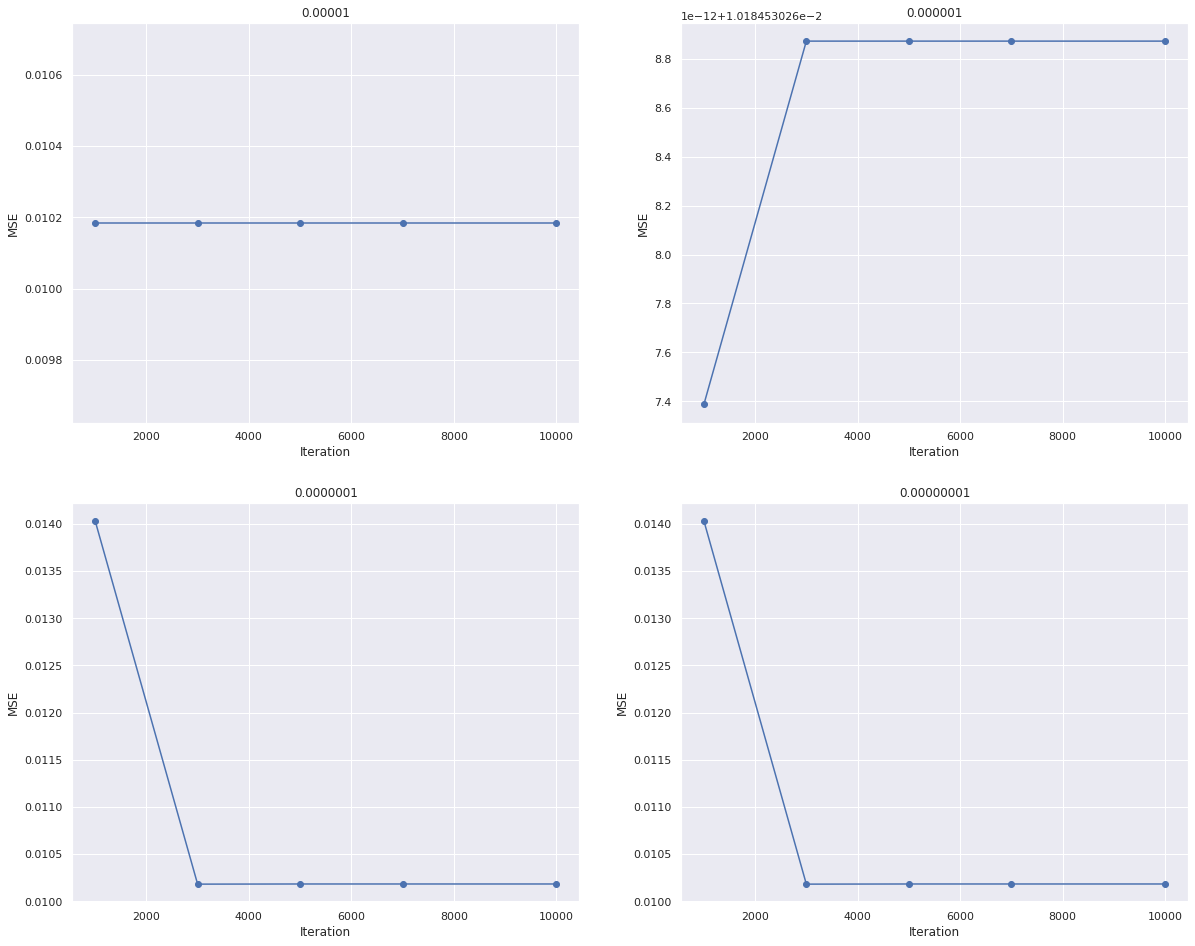

In [57]:
mse1 = mse[:5]
mse2 = mse[5:10]
mse3 = mse[10:15]
mse4 = mse[15:]

plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse1,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,mse2,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,mse3,marker='o')
plt.title("0.0000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.subplot(3,2,4)
plt.grid(True)
plt.plot(iterations,mse4,marker='o')
plt.title("0.00000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MSE')

Text(0, 0.5, 'MAE')

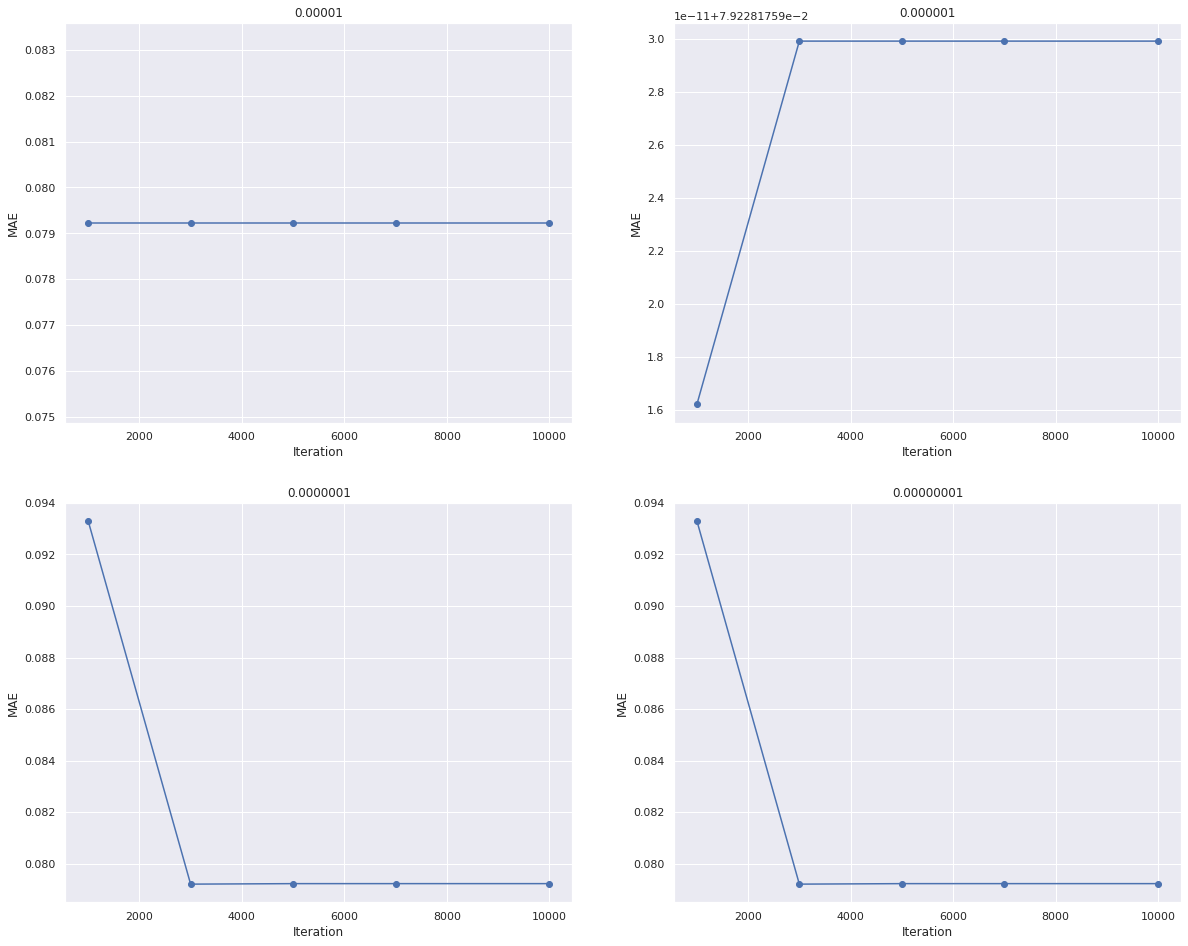

In [58]:
mae1 = mae[:5]
mae2 = mae[5:10]
mae3 = mae[10:15]
mae4 = mae[15:]

r = rscore[:5]
r = rscore[5:10]
r = rscore[10:15]
r = rscore[15:]

plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mae1,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,mae2,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,mae3,marker='o')
plt.title("0.0000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.subplot(3,2,4)
plt.grid(True)
plt.plot(iterations,mae4,marker='o')
plt.title("0.00000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('MAE')

Text(0, 0.5, 'R2_Score')

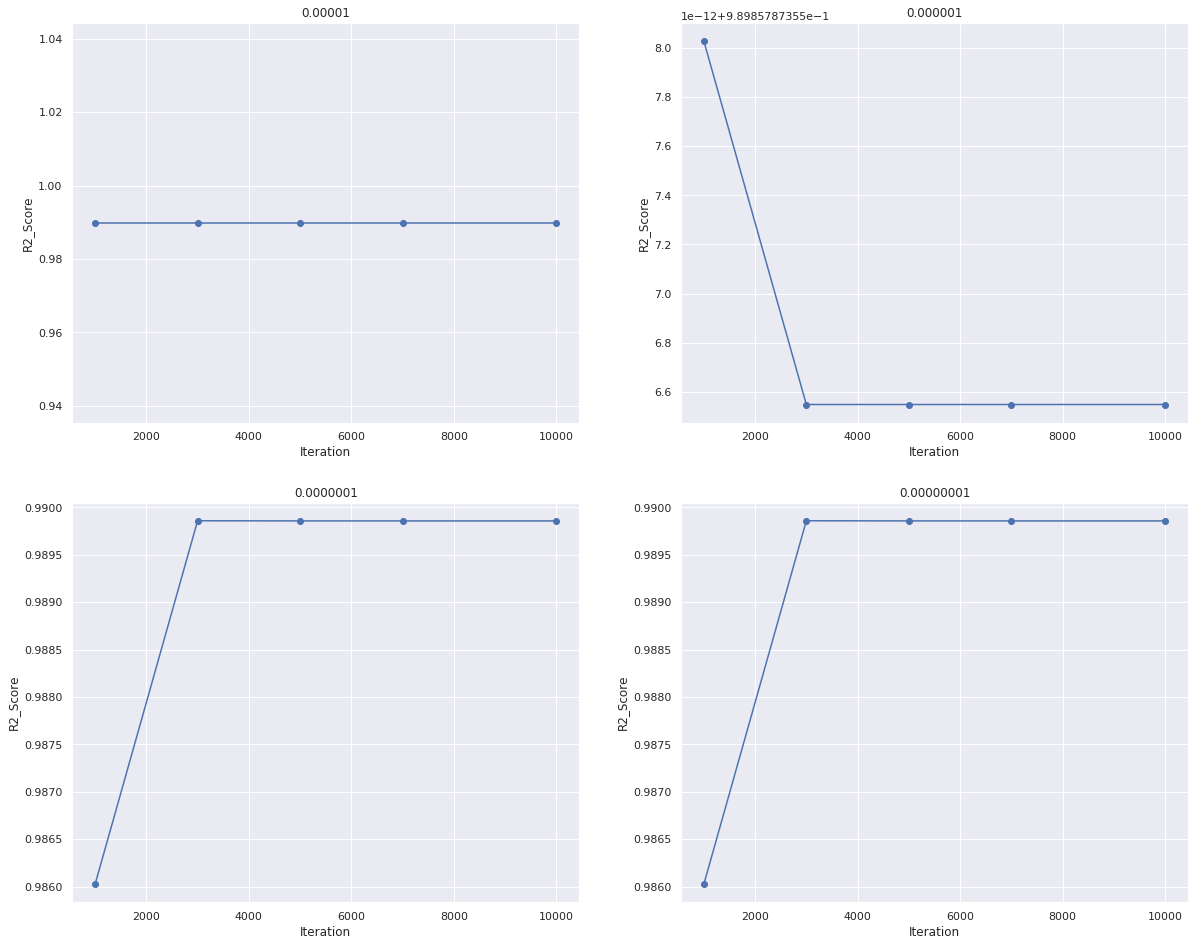

In [60]:

r1 = rscore[:5]
r2 = rscore[5:10]
r3 = rscore[10:15]
r4 = rscore[15:]

plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,r1,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,r2,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,r3,marker='o')
plt.title("0.0000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,4)
plt.grid(True)
plt.plot(iterations,r4,marker='o')
plt.title("0.00000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')

In [64]:
def cost(X,Y,W):
    result = np.matmul(X,W)
    result = np.subtract(result,Y)
    result = np.square(result)
    result = np.sum(result)
    return result/2

def cost_calculate(X,Y,W,iteration,learningrate,costt):
#     global iteration,learningrate
    for i in range(0,iteration):
        temp = X.dot(W)
        temp = np.subtract(temp,Y)
        temp = X.T.dot(temp)
        temp = learningrate * temp
        W = np.subtract(W,temp)
        costt.append(cost(X,Y,W))
    return W

def cost_train(df,learning,iteration):
#     global FinalW
    costt=[]
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = cost_calculate(X,Y,W,iteration,learning,costt)
    
    return costt    

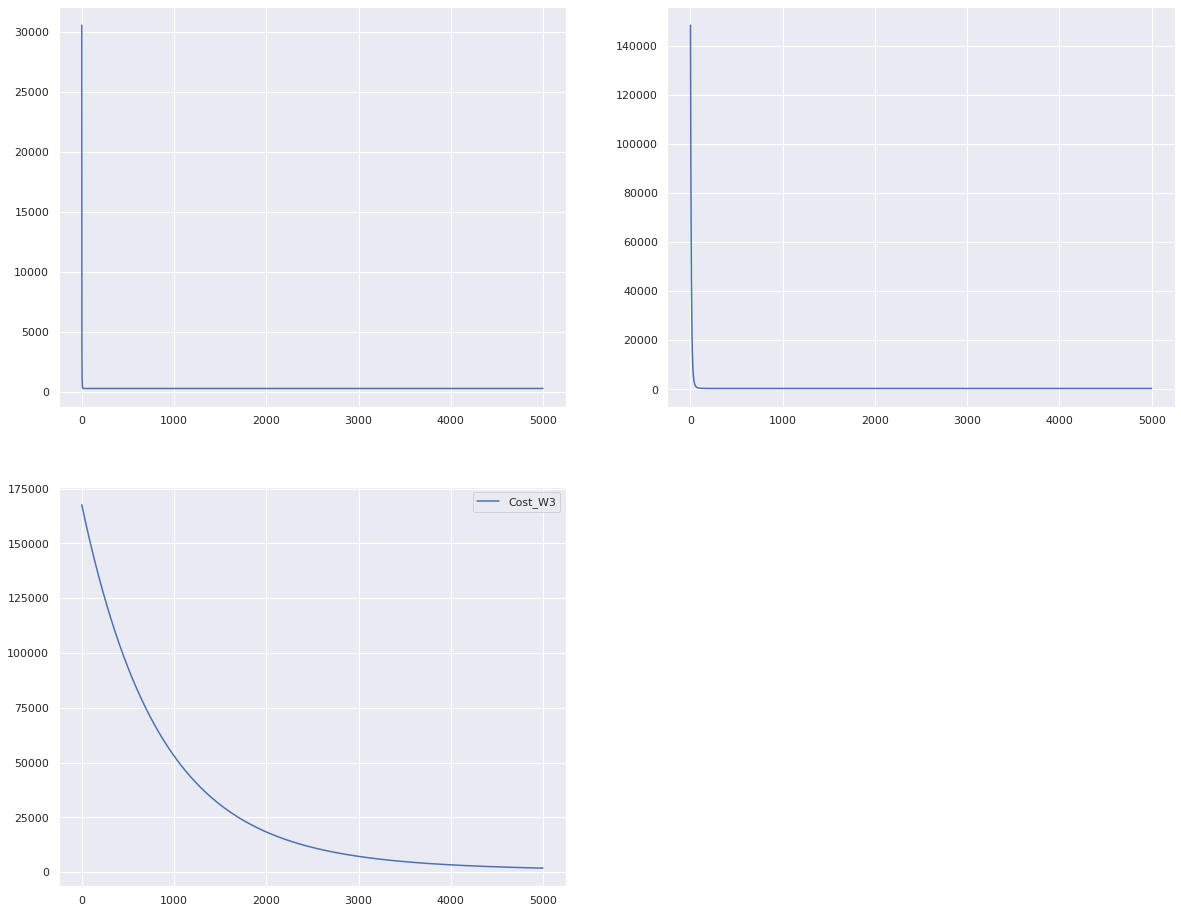

In [75]:
cost1 = cost_train(training_df,0.00001,5000)
cost2 = cost_train(training_df,0.000001,5000)
cost3 = cost_train(training_df,0.00000001,5000)

# t3 = np.arange(0,10000,100)
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
t=np.arange(len(cost1))
plt.plot(t,cost1,label="Cost_W1")

plt.subplot(3,2,2)
plt.grid(True)
t1=np.arange(len(cost2))
plt.plot(t1,cost2,label="Cost_W2")

plt.subplot(3,2,3)
plt.grid(True)
t2=np.arange(len(cost3))
plt.plot(t2,cost3,label="Cost_W3")
# plt.xticks(t3)
plt.legend()
plt.show()

In [84]:
# Change in Coefficient Function

(7, 1)

In [85]:
def parameter(W,learning,iteration):
#     global FinalW
    costt=[]
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = cost_calculate(X,Y,W,iteration,learning,costt)
    return costt

W1  = np.array([[5,8,19,11,1,6,22]])
W2  = np.array([[6,2,11,18,1,9,32]])
W3  = np.array([[7,7,7,7,7,7,7]])


cost_w1  = parameter(W1,0.0000001,3000)
cost_w2  = parameter(W2,0.0000001,3000)
cost_w3  = parameter(W3,0.0000001,3000)

In [88]:
W4  = np.array([[6,-5,11,-20,3,-9,2]])
cost_w4  = parameter(W3,0.0000001,3000)

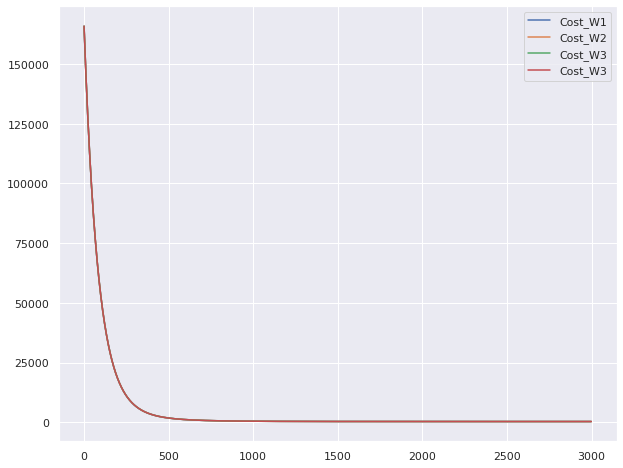

In [89]:
# t3 = np.arange(0,10000,100)
plt.figure(figsize=(10,8))
plt.grid(True)
t=np.arange(len(cost_w1))
t1=np.arange(len(cost_w2))
t2=np.arange(len(cost_w3))
t3=np.arange(len(cost_w4))
plt.plot(t,cost_w1,label="Cost_W1")
plt.plot(t1,cost_w2,label="Cost_W2")
plt.plot(t2,cost_w3,label="Cost_W3")
plt.plot(t3,cost_w4,label="Cost_W3")
# plt.xticks(t3)
plt.legend()
plt.show()

# Traning Data MAE

In [25]:
mse = []
mae = []
mape = []
rscore = []

def costmae(X,Y,W):
    result = np.matmul(X,W)
    result = np.subtract(result,Y)
    result = np.absolute(result)
    result = np.sum(result)
    return result/2

def calculatemae(X,Y,W,iteration,learningrate):
    XT = X.copy()
    prev = 9999999999999
    for i in range(0,iteration):
        temp = np.sum(np.absolute(XT),axis=0).reshape((-1,1))
        temp = np.multiply(temp,learningrate)
        temp = np.divide(temp,len(X))
        W = np.subtract(W,temp)
        temp = costmae(X,Y,W)
        if(temp > prev):
            return W
        prev = temp
    return W

def trainmae(df,learning,iteration):
#     global FinalW
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = calculatemae(X,Y,W,iteration,learning)
    
    X_val = validation_df.iloc[:,3:10]
    X_val = X_val.drop(columns = ['Apparent Temperature (C)'])
    X_val = np.array(X_val)
    A=np.ones(len(validation_df))
    X_val = np.c_[A,X_val]
    y_pred = np.matmul(X_val,W)
    y_true = validation_df.iloc[:,4]
    y_true = np.array(y_true)
    
    rscore.append(r2_score(y_true,y_pred))

In [26]:
learning = [0.000001,0.0000001,0.0000001]
iterations = [1000,1500,2000,2500,3000]

for i in learning:
    print(i)
    for j in iterations:
        trainmae(training_df,i,j)

1e-06
1e-07
1e-07


[-4.421660709622976, -4.417905560677071, -4.414152177714436, -4.410400560735069, -4.406650709738969, -4.428424428003396, -4.428048515762546, -4.427672621181529, -4.427296744260346, -4.426920884998996, -4.428424428003396, -4.428048515762546, -4.427672621181529, -4.427296744260346, -4.426920884998996]
15


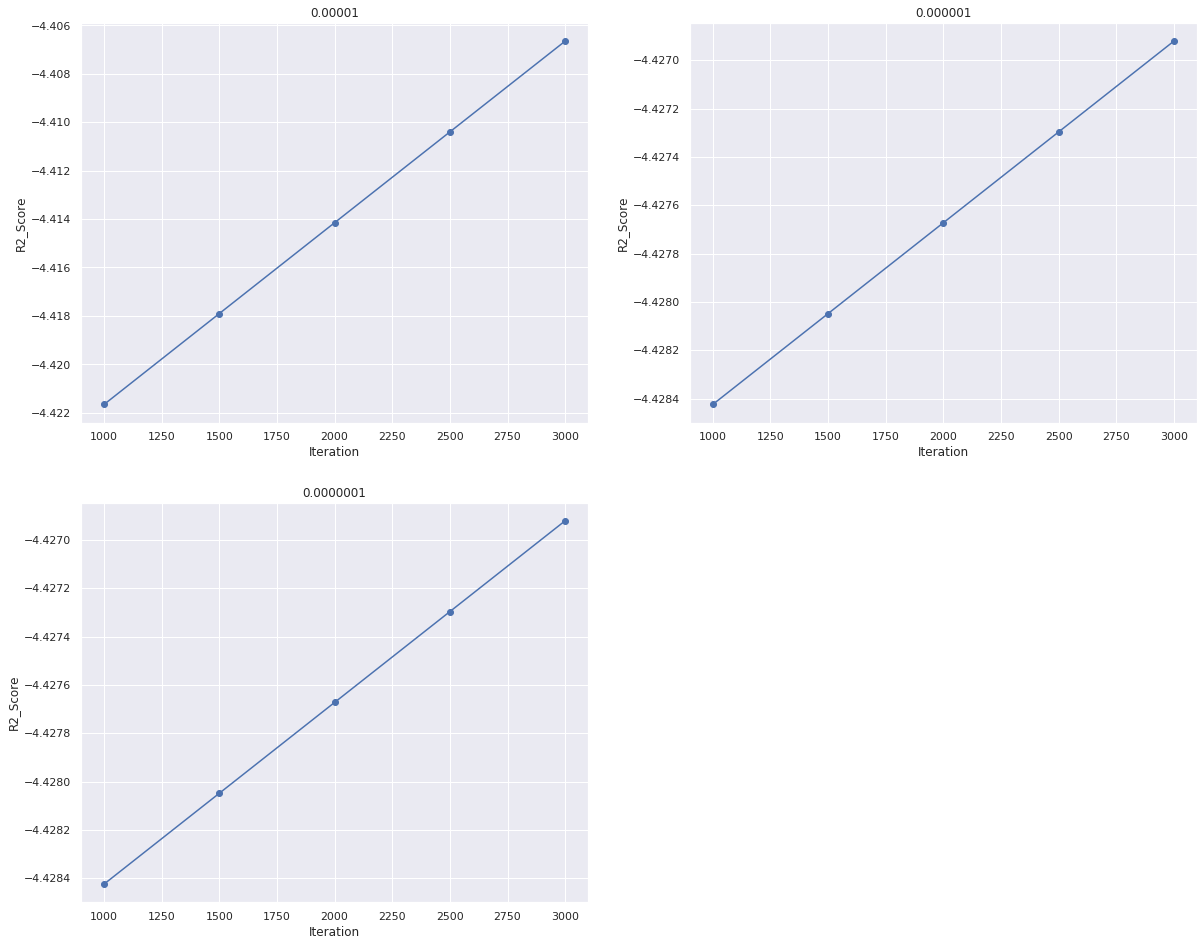

In [28]:
print(rscore)
print(len(rscore))
r1 = rscore[:5]
r2 = rscore[5:10]
r3 = rscore[10:15]
# r4 = rscore[15:]

plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,r1,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,r2,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,r3,marker='o')
plt.title("0.0000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
# plt.subplot(3,2,4)
# plt.grid(True)
# plt.plot(iterations,r4,marker='o')
# plt.title("0.00000001", fontdict=None, loc='center')
# plt.xlabel('Iteration')
# plt.ylabel('R2_Score')
plt.show()

# Training data Cost = MAPE

In [38]:
mse = []
mae = []
mape = []
rscore = []

def costmape(X,Y,W):
    result = np.matmul(X,W)
    result = np.subtract(result,Y)
    result = np.true_divide(result,Y)
    result = np.absolute(result)
    result = np.sum(result)
    return result*100

def calculatemape(X,Y,W,iteration,learningrate):
    XT = X.copy()
    YT = Y.copy()
    prev = 9999999999999
    for i in range(0,iteration):
        XT = np.absolute(XT)
        YT = np.absolute(YT)
        temp = np.sum(np.divide(XT,YT),axis=0).reshape((-1,1))
        temp = np.multiply(temp,learningrate)
        W = np.subtract(W,temp)
        temp = costmape(X,Y,W)
        if(temp > prev):
            return W
        prev = temp
    return W

def trainmape(df,learning,iteration):
#     global FinalW
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = calculatemape(X,Y,W,iteration,learning)
    
    X_val = validation_df.iloc[:,3:10]
    X_val = X_val.drop(columns = ['Apparent Temperature (C)'])
    X_val = np.array(X_val)
    A=np.ones(len(validation_df))
    X_val = np.c_[A,X_val]
    y_pred = np.matmul(X_val,W)
    y_true = validation_df.iloc[:,4]
    y_true = np.array(y_true)
    
    rscore.append(r2_score(y_true,y_pred))

In [39]:
learning = [0.000001,0.0000001,0.000000001]
iterations = [1000,1500,2000,5000]

for i in learning:
    print(i)
    for j in iterations:
        trainmape(training_df,i,j)

1e-06
1e-07
1e-09


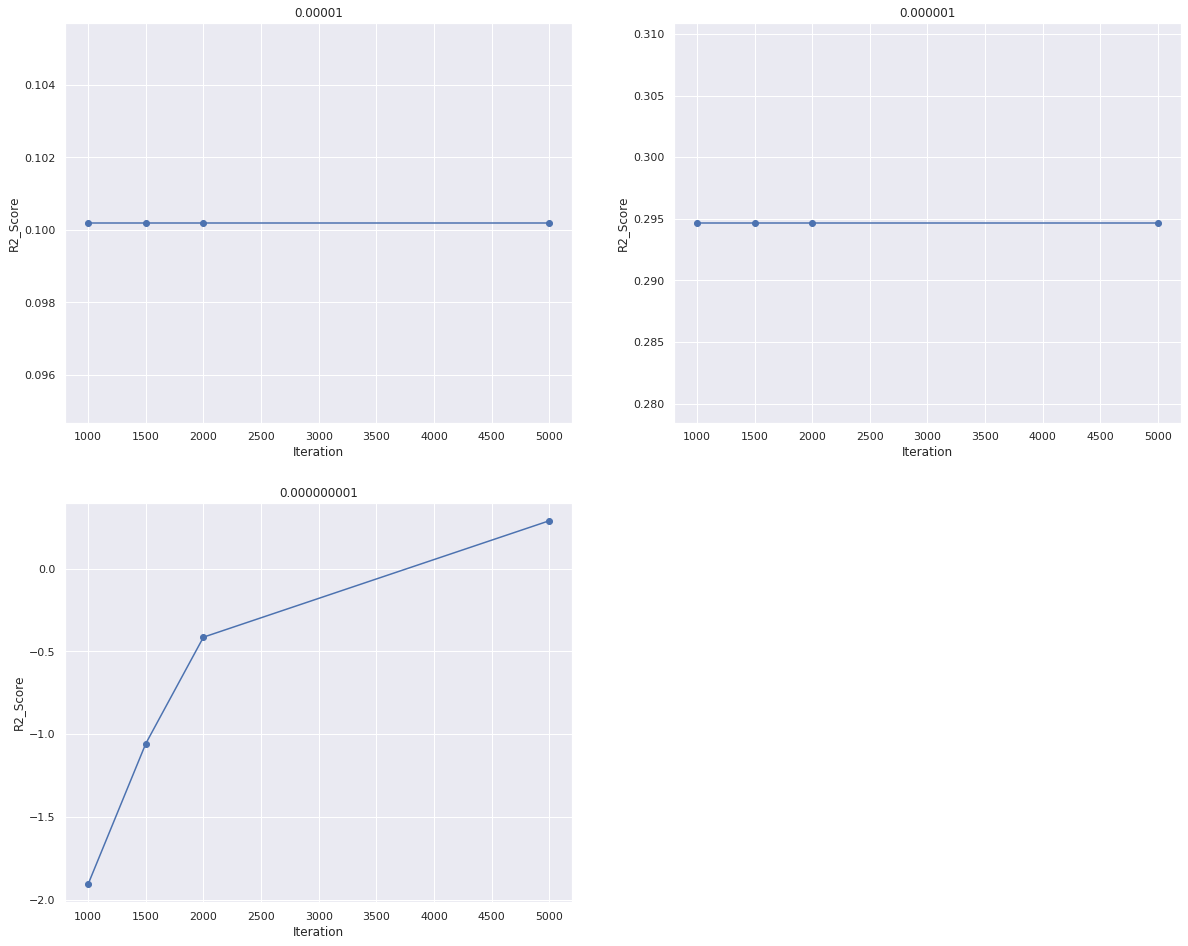

In [44]:
r1 = rscore[:4]
r2 = rscore[4:8]
r3 = rscore[8:]
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,r1,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,r2,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,r3,marker='o')
plt.title("0.000000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.show()

In [ ]:
#Test Data

In [90]:
def final_train(df,learning,iteration):
#     global FinalW
    X = training_df.iloc[:,3:10]
    X = X.drop(columns = ['Apparent Temperature (C)'])
    X = np.array(X)
    A=np.ones(len(training_df))
    X = np.c_[A,X]
    W = np.ones((7,1))
    Y = training_df.iloc[:,4:5]
    Y = np.array(Y)
    W = calculate(X,Y,W,iteration,learning)
    return W 

def score(test_df,W):
    
    X_val = test_df.iloc[:,3:10]
    X_val = X_val.drop(columns = ['Apparent Temperature (C)'])
    X_val = np.array(X_val)
    
    A=np.ones(len(test_df))
    X_val = np.c_[A,X_val]
    ypred = np.matmul(X_val,W)
    yy = test_df.iloc[:,4]
    ytrue = np.array(yy)
    print(r2_score(ytrue,ypred))

In [93]:
W_final = final_train(training_df,0.000001,3000)
score(test_df,W_final)

0.9903471994285931


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
        

class Weather():
    def __init__(self):
        self.training_df = None
        self.X = None
        self.W = None
        self.Y = None
        self.test_df = None
        self.sc = None
        self.num_d = None

    def cost(self):
        result = np.matmul(self.X,self.W)
        result = np.subtract(result,self.Y)
        result = np.square(result)
        result = np.sum(result)

        return result/2

    def calculate(self,iteration,learningrate):
        for i in range(0,iteration):
            temp = self.X.dot(self.W)
            temp = np.subtract(temp,self.Y)
            temp = self.X.T.dot(temp)
            temp = learningrate * temp
            self.W = np.subtract(self.W,temp)
            #print(i,cost(X,Y,W))
            #return self.W
    
    def train(self,path):
        self.training_df = pd.read_csv(path)
        
        
        self.Y = self.training_df.iloc[:,4:5]
        self.Y = np.array(self.Y)
        self.X = self.training_df.iloc[:,3:10]
        self.X = self.X.drop(columns = ['Apparent Temperature (C)'])
        
        self.sc = StandardScaler()
        num_d = self.X.select_dtypes(exclude=['object'])
        self.X[num_d.columns] = self.sc.fit_transform(num_d)
        self.X = np.array(self.X)
        
        A=np.ones(len(self.training_df))
        self.X = np.c_[A,self.X]
        self.W = np.ones((7,1))
        self.calculate(3000,0.00000001)

    def predict(self,testpath):
        self.test_df = pd.read_csv(testpath)
        test_X = self.test_df.iloc[:,3:9]
               
        num_d = test_X.select_dtypes(exclude=['object'])
        test_X[num_d.columns] = self.sc.transform(num_d)
                
        test_X = np.array(test_X)
        
        A=np.ones(len(self.test_df))
        test_X = np.c_[A,test_X]
        
        ypred = np.matmul(test_X,self.W)
#         yy = test_df.iloc[:,4]
#         ytrue = np.array(yy)
        # print(r2_score(ytrue,ypred))
        return ypred

    def display(self):
        print(self.X)
        print(self.W)
        print(self.training_df)
        print(self.test_df)
      


In [24]:
mm = Weather()
mm.train("/home/pratik/Desktop/2ndSem/Smai-2/Datasets/Question-4/weather.csv")

In [25]:
ypred = mm.predict("/home/pratik/Desktop/2ndSem/Smai-2/Datasets/Question-4/test.csv")

In [30]:
from sklearn.metrics import r2_score
tt = pd.read_csv("/home/pratik/Desktop/2ndSem/Smai-2/Datasets/Question-4/test (copy).csv")
ytrue = tt.iloc[:,4]
# print(l)
print(r2_score(ytrue,ypred))

0.8486575702125395
